# AMSC698K Homework 3
##### Elijah Kin & Noorain Noorani

In [1]:
import qiskit
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

print(qiskit.__version__)

1.2.4


In [2]:
import os

token = os.getenv('IONQ_API_KEY')
print(token)

6BZv6DRaA0VMrdI81tDSCNNXGEct2hW3


### Create a GHZ state of 8 qubits using QISkit or Cirq. Obtain frequency plots for 10,000 samples when...

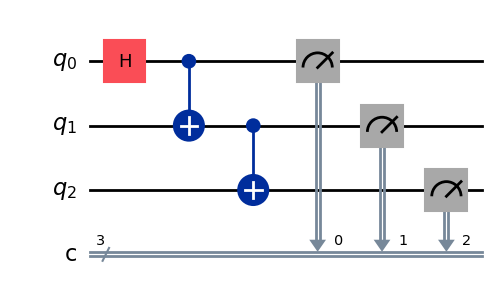

In [3]:
def ghz_circuit():
  qc = QuantumCircuit(3, 3)
  qc.h(0)
  qc.cx(0, 1)
  qc.cx(1, 2)
  qc.measure([0, 1, 2], [0, 1, 2])
  return qc

qc = ghz_circuit()
qc.draw(output='mpl')

a) sampling on a QISkit AER simulator or Cirq Simulator without noise model and with the simple noise models for Aria-1 and Forte-1 (show all results on a single frequency plot);

In [4]:
from qiskit_aer import Aer
from qiskit_ionq import IonQProvider

In [5]:
backend = Aer.get_backend('aer_simulator')
job = backend.run(qc, shots=1000)
result = job.result()
aer_counts = result.get_counts(qc)
print(aer_counts)

{'000': 506, '111': 494}


In [8]:
provider = IonQProvider(token=token)
noisy_backend = provider.get_backend('ionq_simulator')
noisy_backend.set_options(noise_model='aria-1')
job = noisy_backend.run(qc, shots=1000)
result = job.result()
aria_counts = result.get_counts(qc)
print(aria_counts)

{'000': 505, '001': 3, '010': 2, '011': 4, '100': 1, '101': 6, '110': 4, '111': 475}


In [9]:
# TODO forte_counts
noisy_backend.set_options(noise_model='forte-1')
job = noisy_backend.run(qc, shots=1000)
result = job.result()
forte_counts = result.get_counts(qc)
print(forte_counts)

{'000': 488, '001': 5, '010': 1, '100': 1, '110': 4, '111': 501}


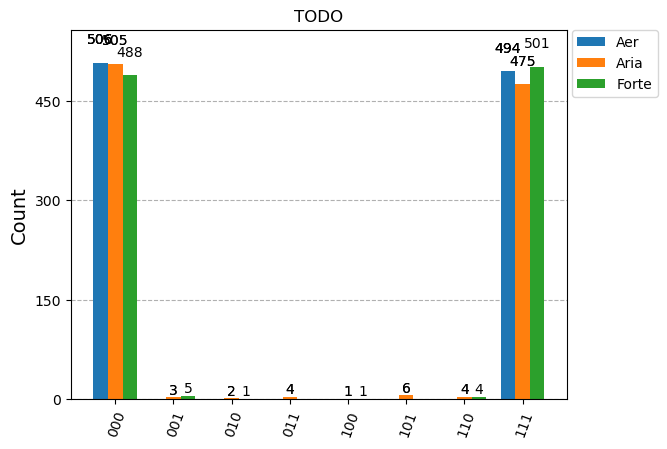

In [11]:
plot_histogram([aer_counts, aria_counts, forte_counts], title='TODO', legend=['Aer', 'Aria', 'Forte'])

b) sampling on the "ionq_simulator" backend for ideal quantum devices and with noise models "harmony" and "aria-1" (show all results on a single frequency plot);

In [ ]:
provider = IonQProvider()

print(provider.backends())
simulator_backend = provider.get_backend('simulator')

In [ ]:
# Ideal Simulator
simulator_backend = provider.get_backend('simulator')

# Noisy Simulator
# Aria Noise Model
noisy_backend_aria = provider.get_backend('ionq_simulator')
noisy_backend_aria.set_options(noise_model='aria-1')

# Harmony Noise Model
noisy_backend_harmony = provider.get_backend('ionq_simulator')
noisy_backend_harmony.set_options(noise_model='harmony-1')

In [ ]:
# Run the circuit on IonQ's platform:
job_ideal = simulator_backend.run(qc, shots=10000)
job_aria = noisy_backend_aria.run(qc, shots=10000)
job_harmony = noisy_backend_harmony.run(qc, shots=10000)

# Print the counts
print(job.get_counts())

c) sampling on a real quantum computer ("ionq_qpu.forte-1") with and without error mitigation.

In [ ]:
# TODO
qpu_backend = provider.get_backend('ionq_qpu')

In [ ]:
from qiskit_ionq import ErrorMitigation

# Run the circuit on IonQ's platform:
# job_error_mitigation = qpu_backend.run(
#     qc,
#     shots=1000,
#     error_mitigation=ErrorMitigation.NO_DEBIASING
# )

# Save results

d) using your IBMQE account, find the least busy IBM quantum device, then i) perform the sampling on this quantum device and ii) simulate the sampling using the QISkit noise model for this quantum device.

In [ ]:
# TODO

### 2. A half adder is a logical circuit that adds 2 bits resulting in 2 one-bit registers, one containing the sum, the other the 'carry' (overflow) bit. A full adder adds 2 input bits as well as a carry bit (eg. from addition of less significant bits). 

Expand the quantum circuit for the half adder presented in class to realize a full adder.

### Half Adder

In [ ]:
# TODO
from qiskit import QuantumRegister, ClassicalRegister

X = QuantumRegister(1, "in |X⟩")
Y = QuantumRegister(1, "in |Y⟩")
sum_out = QuantumRegister(1, "out SUM |0⟩")
SUM = QuantumCircuit(X, Y, sum_out, name='SUM')
SUM.cx(1, 2)
SUM.cx(0, 2)

sum_circuit = SUM.draw('mpl', True)
SUM = SUM.to_instruction() #converts circuit to quantum gate compatible with classical bits

sum_circuit

In [ ]:
c = ClassicalRegister(4)
cout = QuantumRegister(1, 'out Carry |0⟩')
half_adder = QuantumCircuit(X, Y, sum_out, cout, c)

half_adder.barrier()
half_adder.ccx(0, 1, 3)
half_adder.barrier()
half_adder.append(SUM, [0, 1, 2])

half_adder.measure(X, c[3])
half_adder.measure(Y, c[2])
half_adder.measure(sum_out, c[1])
half_adder.measure(cout ,c[0])

half_adder_circuit = half_adder.draw('mpl', True)
half_adder_circuit

### Full Adder

In [ ]:
# Need to add carry state input to the circuit
cin = QuantumRegister(1, "in |Carry⟩")
cout = QuantumRegister(1, 'out |0⟩')
carry = QuantumCircuit(cin, X, Y, cout, name='CARRY')
carry.ccx(1, 2, 3)
carry.cx(1, 2)
carry.ccx(0, 2, 3)

carry_circuit = carry.draw('mpl', True)
carry_circuit

In [ ]:
## Full adder is having to half adder with from output of half adder x,y and carry between x+y and cin
c = ClassicalRegister(2)
cin = QuantumRegister(1, "in |Carry⟩")
cout = QuantumRegister(1, 'out Carry |0⟩')
full_adder = QuantumCircuit(cin, X, Y, sum_out, cout, c)

# Full Adder 1-bit
full_adder.barrier()
full_adder.append(carry, [0,1,2,4])

full_adder.barrier()
full_adder.cx(1,2)
full_adder.append(SUM, [1,2,3])

full_adder.measure(sum_out, c[0])
full_adder.measure(cout, c[1])


full_adder.draw('mpl', True)